

# Investigate TMDB Movies Dataset Project

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

This data set contains informationabout 10,000 movies collected fromThe Movie Database (TMDb),including user ratings and revenue.

In this project I'm trying to know who's the most successful in the movie industry inculding the most successful movies, production companies, actros, genres & release months.

To figure out this we will need to answer the following questions:

1. What's the bigest 10 productions companies by revnue?
2. What's the top 20 actors in demand? 
3. What's the best month for releasing movies?
4. What's the most successful genres in terms of generating the highest revenues?



In [41]:
# Use this cell to set up import statements for all of the packages that you
#   plan to use.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as srs
% matplotlib inline

# Remember to include a 'magic word' so that your visualizations are plotted
#   inline with the notebook. See this page for more:
#   http://ipython.readthedocs.io/en/stable/interactive/magics.html


<a id='wrangling'></a>
## Data Wrangling

### General Properties

In [42]:
## Read the CSV file and exploring the columns
df = pd.read_csv('movies.csv')
df.head()

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


In [43]:
# Exploring the data dimensions, info and data types. 
df.shape

(10866, 21)

In [44]:
df.describe()

,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,10866.000000,10866.000000,1.086600e+04,1.086600e+04,10866.000000,10866.000000,10866.000000,10866.000000,1.086600e+04,1.086600e+04
mean,66064.177434,0.646441,1.462570e+07,3.982332e+07,102.070863,217.389748,5.974922,2001.322658,1.755104e+07,5.136436e+07
std,92130.136561,1.000185,3.091321e+07,1.170035e+08,31.381405,575.619058,0.935142,12.812941,3.430616e+07,1.446325e+08
min,5.000000,0.000065,0.000000e+00,0.000000e+00,0.000000,10.000000,1.500000,1960.000000,0.000000e+00,0.000000e+00
25%,10596.250000,0.207583,0.000000e+00,0.000000e+00,90.000000,17.000000,5.400000,1995.000000,0.000000e+00,0.000000e+00
50%,20669.000000,0.383856,0.000000e+00,0.000000e+00,99.000000,38.000000,6.000000,2006.000000,0.000000e+00,0.000000e+00
75%,75610.000000,0.713817,1.500000e+07,2.400000e+07,111.000000,145.750000,6.600000,2011.000000,2.085325e+07,3.369710e+07
max,417859.000000,32.985763,4.250000e+08,2.781506e+09,900.000000,9767.000000,9.200000,2015.000000,4.250000e+08,2.827124e+09


In [45]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
id                      10866 non-null int64
imdb_id                 10856 non-null object
popularity              10866 non-null float64
budget                  10866 non-null int64
revenue                 10866 non-null int64
original_title          10866 non-null object
cast                    10790 non-null object
homepage                2936 non-null object
director                10822 non-null object
tagline                 8042 non-null object
keywords                9373 non-null object
overview                10862 non-null object
runtime                 10866 non-null int64
genres                  10843 non-null object
production_companies    9836 non-null object
release_date            10866 non-null object
vote_count              10866 non-null int64
vote_average            10866 non-null float64
release_year            10866 non-null int64
budget_adj              1


### Data Cleaning 
1. We will remove the columns that we will not use in this project.
2. Remove any duplicated rows
3. Checking if there any 0 values and dropping entries that conatis it.
4. Change release date column to a standard date format.
5. Change budget and revenue column format to integer.


In [46]:
#1. Removeing the columns that are not needed for answering our questions 

df.drop(['popularity', 'id', 'imdb_id', 'budget', 'revenue', 'homepage', 'keywords', 'overview', 'vote_count', 'vote_average'], axis=1, inplace=True)

In [47]:
#Checking the dataset after dropping columns
df.head()

,original_title,cast,director,tagline,runtime,genres,production_companies,release_date,release_year,budget_adj,revenue_adj
0,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,The park is open.,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,2015,1.379999e+08,1.392446e+09
1,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,What a Lovely Day.,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,2015,1.379999e+08,3.481613e+08
2,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,Robert Schwentke,One Choice Can Destroy You,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2015,1.012000e+08,2.716190e+08
3,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,J.J. Abrams,Every generation has a story.,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,2015,1.839999e+08,1.902723e+09
4,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,James Wan,Vengeance Hits Home,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2015,1.747999e+08,1.385749e+09


In [48]:
#2. Removing the duplicated rows
df.drop_duplicates(inplace=True)

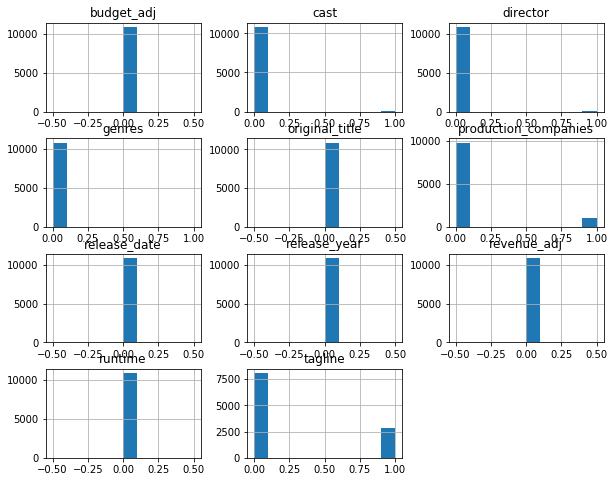

In [49]:
#3. Creating a histrogram for the columns to see if there's any 0 values.
df.isnull().hist(figsize=(10, 8));

In [50]:
df.isnull().sum()

original_title             0
cast                      76
director                  44
tagline                 2824
runtime                    0
genres                    23
production_companies    1030
release_date               0
release_year               0
budget_adj                 0
revenue_adj                0
dtype: int64

In [51]:
#According to the historgram and the isnull command there's multiple columns contain values of 0s.
#Drop the 0s from all rows to get the most accurate data
df.dropna(inplace=True)

In [52]:
#Checking the null values again
df.isnull().sum()

original_title          0
cast                    0
director                0
tagline                 0
runtime                 0
genres                  0
production_companies    0
release_date            0
release_year            0
budget_adj              0
revenue_adj             0
dtype: int64

In [53]:
#Getting the datatypes of all the columns
df.dtypes

original_title           object
cast                     object
director                 object
tagline                  object
runtime                   int64
genres                   object
production_companies     object
release_date             object
release_year              int64
budget_adj              float64
revenue_adj             float64
dtype: object

In [ ]:
#Change release_date column to a standard date format
df['release_date']=pd.to_datetime(df['release_date'])

In [15]:
#Checking the data after changing date format
df.head(1)

,original_title,cast,director,tagline,runtime,genres,production_companies,release_date,release_year,budget_adj,revenue_adj
0,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,The park is open.,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,2015-06-09,2015,1.379999e+08,1.392446e+09


In [16]:
#Change format of adjusted budget and adjusted revenue to integer
df['budget_adj'] = df['budget_adj'].astype(int)

In [17]:
df['revenue_adj'] = df['revenue_adj'].astype(int)

In [18]:
#Getting the datatypes of all the columns after changes
df.dtypes

original_title                  object
cast                            object
director                        object
tagline                         object
runtime                          int64
genres                          object
production_companies            object
release_date            datetime64[ns]
release_year                     int64
budget_adj                       int64
revenue_adj                      int64
dtype: object

<a id='eda'></a>
## Exploratory Data Analysis


###  Question 1: What's the bigest 10 productions companies by revnue?

In [19]:
#Using functions to organize the code and keep track of data 
def entry(data):
    #Filtring data spreated by "|"
    entry = df[data].str.cat(sep = '|')
    
    #Using series to split data spreated by "|" and save it separately 
    entry = pd.Series(entry.split('|'))
    
    #Arrange the data descendingly
    fildata = entry.value_counts(ascending = False)
    
    return fildata

In [20]:
fildata = entry('production_companies')

In [21]:
#Filirting the data to just the top 10 companies

In [22]:
production_companies=fildata.head(10)

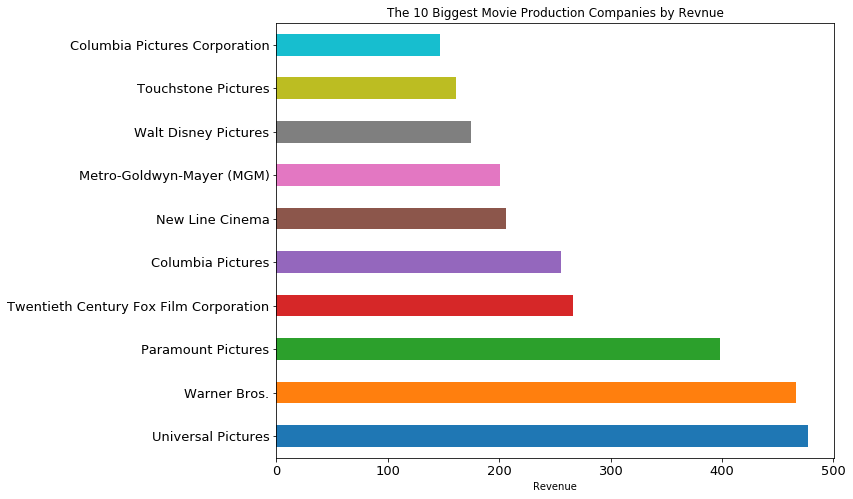

In [24]:
#Plotting The 10 Biggest Movie Production Companies by Revnue

#Assigning data to the polt 
pc_plot = production_companies.plot.barh(fontsize = 13)
#Setting the plot title
pc_plot.set(title = 'The 10 Biggest Movie Production Companies by Revnue')
#setting the x axis title
pc_plot.set_xlabel('Revenue')
#setting the plot size
pc_plot.figure.set_size_inches(10, 8)
plt.show()

We can conculde that Universal Pictures are the biggest movie production in the world followed by Warner Bros.

###  Question 2 : What's the top 20 actors in demand? 

In [25]:
#Using the entry(data) function again to get the cast induvidal data
top_actors = entry('cast').head(20)

In [26]:
pd.DataFrame(data=top_actors)

,0
Robert De Niro,66
Samuel L. Jackson,60
Bruce Willis,58
Nicolas Cage,54
Robin Williams,50
Morgan Freeman,45
Liam Neeson,43
Tom Hanks,43
Dennis Quaid,42
Michael Caine,42


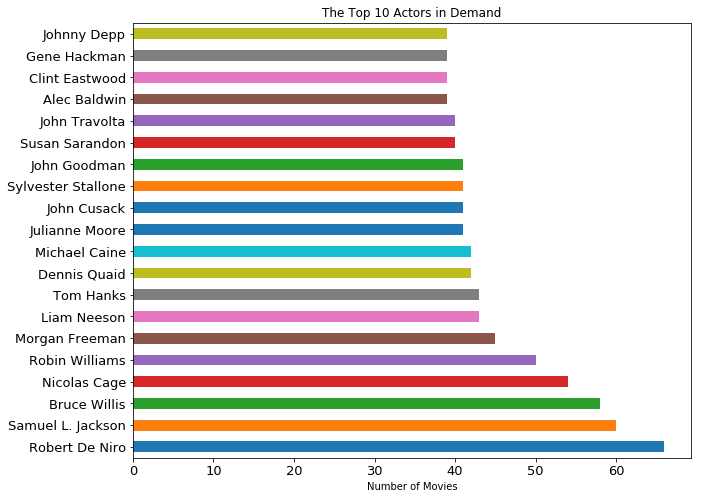

In [40]:
#Plotting The Top 20 Actors in Demand Data

#Assigning data to the polt 
ac_plot = top_actors.plot.barh(fontsize = 13)
ac_plot.set(title = 'The Top 10 Actors in Demand')
ac_plot.set_xlabel('Number of Movies')
ac_plot.figure.set_size_inches(10, 8)
plt.show()

From the previous bar chart we can see that Robert De Niro are the most casted actor with over 60 movies.

### Question 3: What's the best month for releasing movies?

In [28]:
#Making a new column to store months data that's extracted from relase date column
df['month'] = df['release_date'].apply(lambda x: x.month)

In [29]:
#Using Group By and sum to get revenues by month
top_month = df.groupby('month')['revenue_adj'].sum()
top_month

month
1     16950522481
2     22584900052
3     39804389714
4     31236859440
5     60500157867
6     78390944612
7     57762424630
8     31321715720
9     30115572734
10    37445221947
11    57253129034
12    79656352757
Name: revenue_adj, dtype: int64

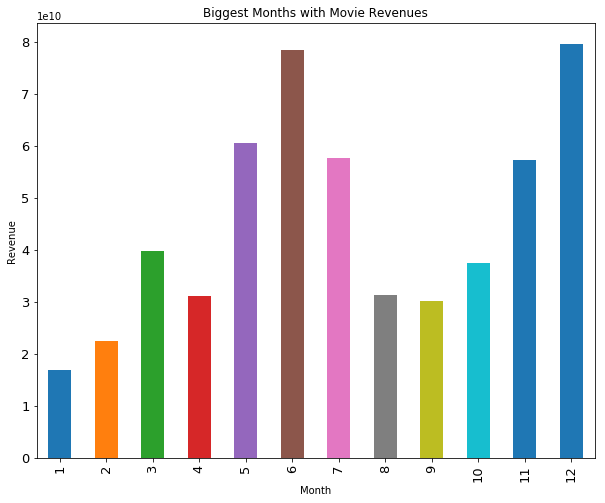

In [30]:
#Plotting The Biggest Months with Movie Revenues

#Assigning data to the polt 
mr_plot = top_month.plot.bar(fontsize = 13)
mr_plot.set(title = 'Biggest Months with Movie Revenues')
mr_plot.set_ylabel('Revenue')
mr_plot.set_xlabel('Month')
mr_plot.figure.set_size_inches(10, 8)
plt.show()

From the previous bar chart we can figure out that that June and December have the highest revenue for movie releases following closely by May and July.

### Question 4: What's the most successful genres in terms of generating the highest revenues?

In [32]:
#Filtring data spreated by "|"
genre =df['genres'].astype(str).str.cat(sep = '|')
#Using series to split data spreated by "|" and save it separately 
genre=pd.Series(genre.split('|'))
#Using group by and sum to the revenue by each genre
genre_rev = df.groupby(genre)['revenue_adj'].sum().sort_values(ascending = False).head(10)
genre_rev

Drama              85978939326
Thriller           72956931644
Comedy             70383923302
Action             58609708134
Horror             35892691468
Science Fiction    33253045292
Adventure          28004518628
Romance            26876030969
Crime              26841347337
Fantasy            22783181613
Name: revenue_adj, dtype: int64

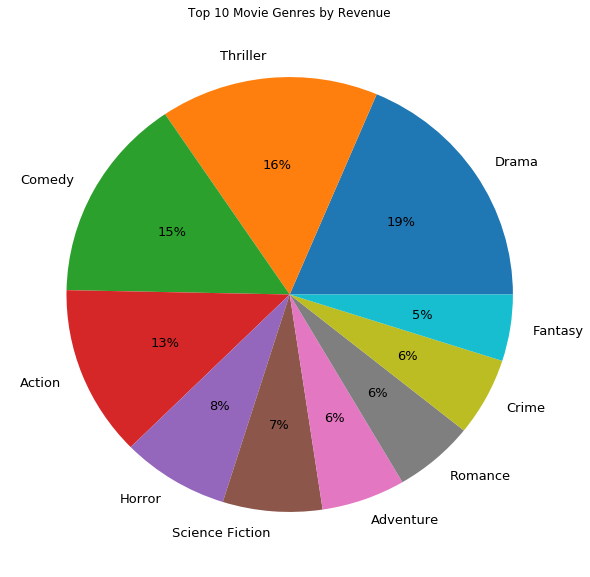

In [39]:
#Plotting a bar chart with the top 10 genres in terms of revenue
#Assigning data to the polt 
g_plot = genre_rev.plot.pie(autopct='%1.0f%%' , fontsize = 13)
g_plot.set_ylabel('')
g_plot.set(title = 'Top 10 Movie Genres by Revenue')
g_plot.figure.set_size_inches(10, 10)
plt.show()

From the previous chart we can understand that Drama genre genrates the most revenues as it's genrated almost fifth of the total movie industry revenues. 

<a id='conclusions'></a>
## Conclusions

1. Relasing a movie in June or December will bring the most revenus, this propably due to summer and winter breaks.
2. Drama, Action, Comedy and Thriller will mostly bring higher revenues.
3. Robert De Niro was the most casted actor through out this data, Samuel L. Jackson and Bruce Willis came after him with 60 and 58 movies.
4. Universal Pictures are the biggest movie production company in the world by a mile; alomst doubling the revenue of it's nearest compatitor Warner Bros.


## Limitations
This dataset have plenty null/zero entries in multiple rows and these null/zero entries hamper the analysis and we had to remove them to get more accurate results since it will effect getting the estimated revenue across month and genres, also there's no currency for the revenue and budget.

In [31]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Investigate_a_Dataset.ipynb'])

0